## Reto 3: Dataset de entrenamiento y de prueba

### 1. Objetivos:
    - Aplicar la técnica de división del dataset en entrenamiento y prueba para entrenar un modelo de Regresión Linear Múltiple

---
    
### 2. Desarrollo:

Para este Reto vamos a utilizar el dataset 'wine_quality_red-clean.csv'. Este dataset tiene muchas variables numéricas. Realiza los procesos que se enumeran a continuación. Explica paso a paso tu proceso para que puedas presentarlo a los demás.

1. Explora las correlaciones que existen entre estas variables.
2. Elige dos o más variables independientes y una variable dependiente.
3. Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.
4. Separa tus datos en dataset de entrenamiento y prueba usando `scikit-learn`.
5. Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
6. Evalúa tu modelo usando el dataset de prueba.
7. Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.
8. Presenta tus hallazgos a tus compañeros.

In [3]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#import dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

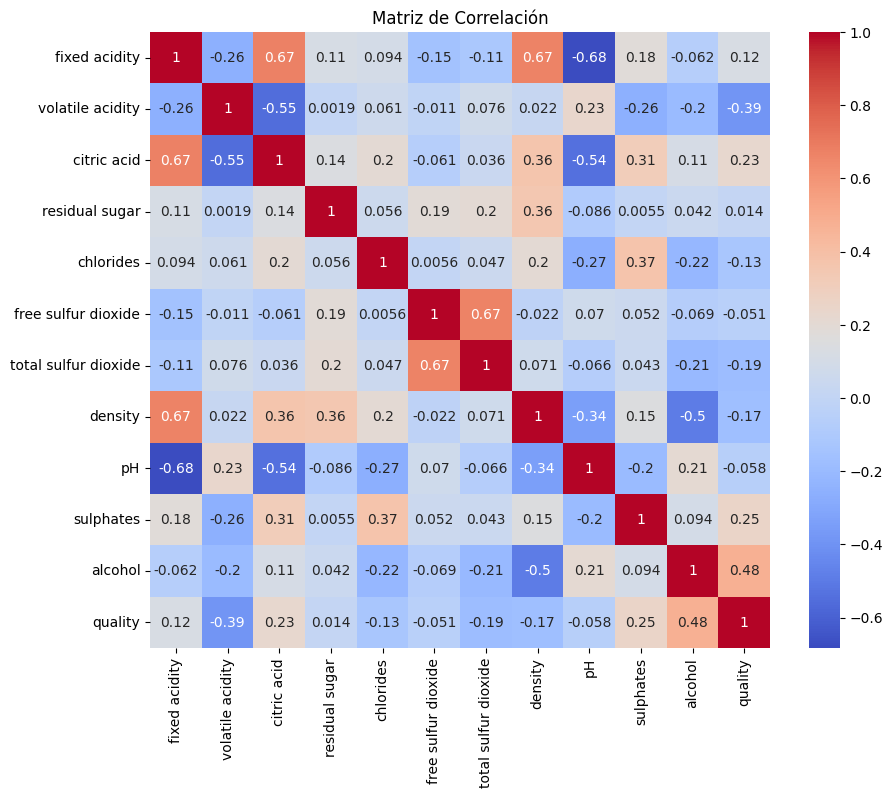

In [12]:
matriz_corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [13]:
print(matriz_corr['quality'].sort_values(ascending=False))


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [14]:
x=df[['alcohol','density']]
y=df['quality']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
modelo=LinearRegression()
modelo.fit(x_train, y_train)
train=modelo.score(x_train, y_train)
test=modelo.score(x_test, y_test)

In [17]:
y_pred=modelo.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')
print(f'Train: {train}')
print(f'Test: {test}')

MSE: 0.4954861294401143
R2: 0.24180308052021549
Train: 0.22808823693371327
Test: 0.24180308052021549
